## Analysing Food Delivery Data

## Table of Contents
* [Part 1 : Working with RDD](#part-1)  
    - [1.1 Data Preparation and Loading](#1.1)  
    - [1.2 Data Partitioning in RDD](#1.2)  
    - [1.3 Query/Analysis](#1.3)  
* [Part 2 : Working with DataFrames](#2-dataframes)  
    - [2.1 Data Preparation and Loading](#2-dataframes)  
    - [2.2 Query/Analysis](#2.2)  
* [Part 3 :  RDDs vs DataFrame vs Spark SQL](#part-3)  

# Part 1 : Working with RDDs (30%) <a class="anchor" name="part-1"></a>
## 1.1 Working with RDD
In this section, you will need to create RDDs from the given datasets, perform partitioning in these RDDs and use various RDD operations to answer the queries. 

1.1.1 Data Preparation and Loading <a class="anchor" name="1.1"></a>
Write the code to create a SparkContext object using SparkSession. To create a SparkSession, you first need to build a SparkConf object that contains information about your application. Use Melbourne time as the session timezone. Give your application an appropriate name and run Spark locally with 4 cores on your machine.

In [1]:
from pyspark.sql import SparkSession
from pyspark import SparkConf

# Create a SparkConf object
conf = SparkConf() \
    .setAppName("Food Delivery Analysis") \
    .setMaster("local[4]") \
    .set("spark.sql.session.timeZone", "Australia/Melbourne")

# Create a SparkSession
spark = SparkSession.builder.config(conf=conf).getOrCreate()

# Verify Spark session
print("Spark Session Created:", spark)

Spark Session Created: <pyspark.sql.session.SparkSession object at 0x7f7807cef5b0>


1.1.2 Load csv files into multiple RDDs.

In [2]:
# File paths
delivery_order_path = "delivery_order.csv"
geolocation_path = "geolocation.csv"
delivery_person_path = "delivery_person.csv"

# Load datasets into RDDs
delivery_order_rdd = spark.sparkContext.textFile(delivery_order_path)
geolocation_rdd = spark.sparkContext.textFile(geolocation_path)
delivery_person_rdd = spark.sparkContext.textFile(delivery_person_path)

1.1.3 For each RDD, remove the header rows and display the total count and first 10 records.

In [3]:
# Function to remove header
def remove_header(rdd):
    header = rdd.first()
    return rdd.filter(lambda row: row != header)

# Remove headers
delivery_order_rdd = remove_header(delivery_order_rdd)
geolocation_rdd = remove_header(geolocation_rdd)
delivery_person_rdd = remove_header(delivery_person_rdd)

# Show total counts and first 10 records for each RDD
print("Delivery Order RDD Count:", delivery_order_rdd.count())
print("First 10 records:", delivery_order_rdd.take(10))

print("Geolocation RDD Count:", geolocation_rdd.count())
print("First 10 records:", geolocation_rdd.take(10))

print("Delivery Person RDD Count:", delivery_person_rdd.count())
print("First 10 records:", delivery_person_rdd.take(10))

Delivery Order RDD Count: 45593
First 10 records: ['"0x1ec7 ",PUNERES05DEL03 ,,,conditions Stormy,Low ,Snack ,No ,(min) 19,"13ecba7d-6322-4875-a125-2b6f2460a8ce","744b5795-a105-41e3-9745-695aca9d7d61"', '"0x2953 ",CHENRES12DEL01 ,,,conditions NaN,NaN ,Meal ,No ,(min) 15,f03b49f5-6b33-4935-8804-4e1e399fcacc,"385d18ff-db68-4530-a84c-a1a521cdb998"', '"0x922 ",SURRES13DEL02 ,,,conditions NaN,NaN ,Buffet ,No ,(min) 39,"3b5cd167-d570-4fb1-9cd6-b46ca1b17609","90afcaf3-61bf-4054-bd12-2680d73c5b39"', '"0x564 ",JAPRES15DEL03 ,,,conditions NaN,NaN ,Meal ,No ,(min) 15,"93f914ed-35f6-41a7-916d-241737e79751",e62499c1-4620-42f8-818d-688082eac064', '"0xbf2e ",DEHRES03DEL03 ,,,conditions Sunny,Medium ,Meal ,No ,(min) 18,"0e693e89-7eb8-4f52-b9da-75c9f774fd40",a8e6e5cb-4bc4-4528-a480-33f90db8b813', '"0x611 ",BANGRES13DEL01 ,,,conditions Cloudy,Jam ,Meal ,No ,(min) 37,"66c95be3-3ecc-4bf2-9ca3-583a8ef6598c","01ee4b30-53e9-41f4-96d6-15c46b6bf70e"', '"0xcd0 ",INDORES010DEL03 ,,,conditions NaN,NaN ,Snack ,No 

1.1.4 Drop records with invalid information(NaN or Null) in any column.

In [4]:
# Function to drop invalid rows
def drop_invalid_records(rdd):
    return rdd.filter(lambda row: all(col != "NaN" and col != "" for col in row.split(",")))

# Clean RDDs
delivery_order_rdd = drop_invalid_records(delivery_order_rdd)
geolocation_rdd = drop_invalid_records(geolocation_rdd)
delivery_person_rdd = drop_invalid_records(delivery_person_rdd)

print("Delivery Order RDD Count:", delivery_order_rdd.count())
print("Delivery Person RDD Count:", delivery_person_rdd.count())
print("Geolocation RDD Count:", geolocation_rdd.count())

# Print 10 records of each cleaned dataset
print("First 10 records of cleaned Delivery Order RDD:")
print(delivery_order_rdd.take(10))

print("\nFirst 10 records of cleaned Geolocation RDD:")
print(geolocation_rdd.take(10))

print("\nFirst 10 records of cleaned Delivery Person RDD:")
print(delivery_person_rdd.take(10))

Delivery Order RDD Count: 43862
Delivery Person RDD Count: 1316
Geolocation RDD Count: 4930
First 10 records of cleaned Delivery Order RDD:
['"0xc342 ",KNPRES15DEL01 ,1707829200,1707829800,conditions Fog,High ,Drinks ,No ,(min) 28,fdeebb45-6668-4b3d-a818-de0819617c55,a88c3c57-6673-4fd2-a41d-132998a6dd53', '"0x9f8b ",PUNERES12DEL01 ,1710276900,1710277200,conditions Stormy,Jam ,Meal ,No ,(min) 38,"3f829c48-bb60-4a55-b7fc-a2b4aba59703",cf5c064e-0dda-484d-9979-5bd63ab4eed4', '"0x9b2e ",PUNERES16DEL02 ,1712133300,1712133900,conditions Windy,Low ,Meal ,No ,(min) 12,a3ad22ea-f857-450b-a9ff-968f5a84d69a,de0825ee-81a7-4245-a0c2-297d34aed634', '"0xb4fe ",INDORES01DEL01 ,1711395600,1711396500,conditions Windy,Jam ,Snack ,No ,(min) 42,fd0d3a4e-d3f0-430e-9b44-f55cbf2722fb,a42dd5df-f7e7-4942-8389-0bb185d6572d', '"0x1cef ",RANCHIRES16DEL01 ,1711753200,1711753800,conditions Fog,Low ,Snack ,No ,(min) 23,ce8d42cc-0691-4c25-98d2-3540361fe1ba,"6b6d5af0-c04c-436e-ada9-19673db38404"', '"0x9403 ",BANGRES12DE

### 1.2 Data Partitioning in RDD <a class="anchor" name="1.2"></a>
1.2.1 For each RDD, using Spark’s default partitioning, print out the total number of partitions and the number of records in each partition

In [5]:
# Check total number of partitions
print("Delivery Order RDD Partitions:", delivery_order_rdd.getNumPartitions())
print("Geolocation RDD Partitions:", geolocation_rdd.getNumPartitions())
print("Delivery Person RDD Partitions:", delivery_person_rdd.getNumPartitions())

# Function to count records in each partition
def count_records_in_partitions(rdd, rdd_name):
    partition_counts = rdd.mapPartitionsWithIndex(
        lambda idx, iterator: [(idx, len(list(iterator)))]
    ).collect()
    
    print(f"\nNumber of records in each partition of {rdd_name}:")
    for partition, count in partition_counts:
        print(f"Partition {partition}: {count} records")

# Print number of records in each partition
count_records_in_partitions(delivery_order_rdd, "Delivery Order RDD")
count_records_in_partitions(geolocation_rdd, "Geolocation RDD")
count_records_in_partitions(delivery_person_rdd, "Delivery Person RDD")

Delivery Order RDD Partitions: 2
Geolocation RDD Partitions: 2
Delivery Person RDD Partitions: 2

Number of records in each partition of Delivery Order RDD:
Partition 0: 21179 records
Partition 1: 22683 records

Number of records in each partition of Geolocation RDD:
Partition 0: 2394 records
Partition 1: 2536 records

Number of records in each partition of Delivery Person RDD:
Partition 0: 655 records
Partition 1: 661 records


1.2.2 Answer the following questions:   
a) How many partitions do the above RDDs have?  
b) How is the data in these RDDs partitioned by default, when we do not explicitly specify any partitioning strategy? Can you explain why it is partitioned in this number?   
c) Assuming we are querying the dataset based on order timestamp, can you think of a better strategy for partitioning the data based on your available hardware resources?  

a) Delivery Order RDD Partitions: 2
Geolocation RDD Partitions: 2
Delivery Person RDD Partitions: 2

b) Default Partitioning Strategy: By default, Spark determines the number of partitions based on:

The number of cores available on the machine or cluster where the job is being executed.
The size of the input dataset.
Explanation for the Number of Partitions:

The number of partitions is 2 because Spark's default partitioning is influenced by either the default parallelism setting or the number of CPU cores available in the environment. In our setup, the Spark session is configured to run locally with 4 cores (local[4]). Spark typically chooses the default number of partitions as a multiple or fraction of the available cores, ensuring efficient parallelism without creating too many small partitions. For moderately sized datasets, Spark may automatically assign fewer partitions (like 2) to avoid unnecessary overhead while still leveraging parallel processing.

c) A better strategy would be to use range partitioning based on the order_ts column. This would divide the dataset into partitions based on time intervals (e.g., monthly or quarterly), ensuring that queries targeting specific time ranges only scan the relevant partition, reducing processing time. Since our machine has 4 cores, we should create at least 4 partitions to maximize parallelism. Additionally, if the dataset is large, increasing the partitions to 8 or more would prevent memory bottlenecks. This strategy improves query efficiency and ensures an even distribution of data across partitions.

1.2.3 Create a user-defined function (UDF) to transform a timestamp to ISO format(YYYY-MM-DD HH:mm:ss), then call the UDF to transform two timestamps(order_ts and ready_ts) to order_datetime and ready_datetime。

In [6]:
from datetime import datetime

# Define indices for order_ts and ready_ts
order_ts_index = 2  
ready_ts_index = 3  

# Define UDF for timestamp transformation
def to_iso_format(timestamp):
    return datetime.fromtimestamp(float(timestamp)).strftime("%Y-%m-%d %H:%M:%S")

# Apply UDF and transform the RDD
order_datetime_rdd = delivery_order_rdd.map(
    lambda row: row.split(",") + [
        to_iso_format(row.split(",")[order_ts_index]),
        to_iso_format(row.split(",")[ready_ts_index])
    ]
)

# Collect the transformed data and display
result = order_datetime_rdd.collect()
for row in result[:10]:  # Display the first 10 rows
    print(row)



['"0xc342 "', 'KNPRES15DEL01 ', '1707829200', '1707829800', 'conditions Fog', 'High ', 'Drinks ', 'No ', '(min) 28', 'fdeebb45-6668-4b3d-a818-de0819617c55', 'a88c3c57-6673-4fd2-a41d-132998a6dd53', '2024-02-13 13:00:00', '2024-02-13 13:10:00']
['"0x9f8b "', 'PUNERES12DEL01 ', '1710276900', '1710277200', 'conditions Stormy', 'Jam ', 'Meal ', 'No ', '(min) 38', '"3f829c48-bb60-4a55-b7fc-a2b4aba59703"', 'cf5c064e-0dda-484d-9979-5bd63ab4eed4', '2024-03-12 20:55:00', '2024-03-12 21:00:00']
['"0x9b2e "', 'PUNERES16DEL02 ', '1712133300', '1712133900', 'conditions Windy', 'Low ', 'Meal ', 'No ', '(min) 12', 'a3ad22ea-f857-450b-a9ff-968f5a84d69a', 'de0825ee-81a7-4245-a0c2-297d34aed634', '2024-04-03 08:35:00', '2024-04-03 08:45:00']
['"0xb4fe "', 'INDORES01DEL01 ', '1711395600', '1711396500', 'conditions Windy', 'Jam ', 'Snack ', 'No ', '(min) 42', 'fd0d3a4e-d3f0-430e-9b44-f55cbf2722fb', 'a42dd5df-f7e7-4942-8389-0bb185d6572d', '2024-03-25 19:40:00', '2024-03-25 19:55:00']
['"0x1cef "', 'RANCHIRES

### 1.3 Query/Analysis <a class="anchor" name="1.3"></a>
For this part, write relevant RDD operations to answer the following queries.

1.3.1 Extract weekday (Monday-Sunday) information from orders and print the total number of orders each weekday.

In [7]:
from datetime import datetime

# Define column indices
order_ts_index = 2  

# Function to extract weekday
def extract_weekday(row):
    timestamp = float(row.split(",")[order_ts_index])  
    weekday = datetime.fromtimestamp(timestamp).strftime("%A")
    return (weekday, 1)

# Apply the function
weekday_orders_rdd = delivery_order_rdd.map(extract_weekday).reduceByKey(lambda a, b: a + b)

# Collect and print results
print("Total orders by weekday:", weekday_orders_rdd.collect())


Total orders by weekday: [('Monday', 5845), ('Friday', 6027), ('Thursday', 6056), ('Saturday', 6896), ('Sunday', 6965), ('Tuesday', 6149), ('Wednesday', 5924)]


1.3.2 Show a list of type_of_order and average preparation time in minutes (ready_ts - order_ts).

In [8]:
# Column indices
order_ts_index = 2
ready_ts_index = 3
type_of_order_index = 6

def calculate_prep_time(row):
    cols = row.split(",")
    type_of_order = cols[type_of_order_index]  # Access 'type_of_order'
    prep_time = (float(cols[ready_ts_index]) - float(cols[order_ts_index])) / 60  # Calculate preparation time in minutes
    return (type_of_order, (prep_time, 1))

prep_time_rdd = delivery_order_rdd.map(calculate_prep_time) \
    .reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1])) \
    .mapValues(lambda v: v[0] / v[1])  # Calculate average

print("Type of order and average preparation time:", prep_time_rdd.collect())

Type of order and average preparation time: [('Snack ', -21.535930033360383), ('Drinks ', -12.50711204918785), ('Meal ', -17.48683971682701), ('Buffet ', -17.5635593220339)]


## Part 2. Working with DataFrames (45%) <a class="anchor" name="2-dataframes"></a>
In this section, you need to load the given datasets into PySpark DataFrames and use DataFrame functions to answer the queries.
### 2.1 Data Preparation and Loading

2.1.1. Load the CSV files into separate dataframes. When you create your dataframes, please refer to the metadata file and think about the appropriate data type for each column.

In [46]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, FloatType, IntegerType

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Delivery Data Analysis") \
    .master("local[4]") \
    .getOrCreate()

from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, LongType

# Initialize Spark session
spark = SparkSession.builder.appName("LoadCSVFiles").getOrCreate()

# Define schema for each DataFrame based on metadata
# Schema for delivery_order.csv
delivery_order_schema = StructType([
    StructField("order_id", StringType(), True),
    StructField("delivery_person_id", StringType(), True),
    StructField("order_ts", LongType(), True),
    StructField("ready_ts", LongType(), True),
    StructField("weather_condition", StringType(), True),
    StructField("road_condition", StringType(), True),
    StructField("type_of_order", StringType(), True),
    StructField("is_festival", StringType(), True),
    StructField("time_taken", StringType(), True),
    StructField("restaurant_geoid", StringType(), True),
    StructField("delivery_geoid", StringType(), True)
])

# Schema for delivery_person.csv
delivery_person_schema = StructType([
    StructField("person_id", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("rating", FloatType(), True),
    StructField("vehicle_condition", IntegerType(), True),
    StructField("type_of_vehicle", StringType(), True)
])

# Schema for geolocation.csv
geolocation_schema = StructType([
    StructField("geoid", StringType(), True),
    StructField("latitude", FloatType(), True),
    StructField("longitude", FloatType(), True),
    StructField("district", StringType(), True),
    StructField("loc", StringType(), True)
])

# Load delivery_order.csv into DataFrame
delivery_order_path = "delivery_order.csv"  
delivery_order_df = spark.read.csv(delivery_order_path, schema=delivery_order_schema, header=True)

# Load geolocation.csv into DataFrame
geolocation_path = "geolocation.csv"  
geolocation_df = spark.read.csv(geolocation_path, schema=geolocation_schema, header=True)

# Load delivery_person.csv into DataFrame
delivery_person_path = "delivery_person.csv"  
delivery_person_df = spark.read.csv(delivery_person_path, schema=delivery_person_schema, header=True)


2.1.2 Display the schema of the dataframes.

In [47]:
# Display DataFrames
print("delivery_order schema:")
delivery_order_df.show(10)
delivery_order_df.printSchema()

print("geolocation schema:")
geolocation_df.show(10)
geolocation_df.printSchema()

print("delivery person schema:")
delivery_person_df.show(10)
delivery_person_df.printSchema()

delivery_order schema:
+--------+------------------+--------+--------+-----------------+--------------+-------------+-----------+----------+--------------------+--------------------+
|order_id|delivery_person_id|order_ts|ready_ts|weather_condition|road_condition|type_of_order|is_festival|time_taken|    restaurant_geoid|      delivery_geoid|
+--------+------------------+--------+--------+-----------------+--------------+-------------+-----------+----------+--------------------+--------------------+
| 0x1ec7 |   PUNERES05DEL03 |    NULL|    NULL|conditions Stormy|          Low |       Snack |        No |  (min) 19|13ecba7d-6322-487...|744b5795-a105-41e...|
| 0x2953 |   CHENRES12DEL01 |    NULL|    NULL|   conditions NaN|          NaN |        Meal |        No |  (min) 15|f03b49f5-6b33-493...|385d18ff-db68-453...|
|  0x922 |    SURRES13DEL02 |    NULL|    NULL|   conditions NaN|          NaN |      Buffet |        No |  (min) 39|3b5cd167-d570-4fb...|90afcaf3-61bf-405...|
|  0x564 |    JAP

When the dataset is large, do you need all columns? How to optimize memory usage? Do you need a customized data partitioning strategy? (Note: Think about those questions but you don’t need to answer these questions.)

ANS:

Column Selection: we may not need all the columns in our dataset for every task. Use the select() function to pick only the relevant columns required for our analysis. This minimizes the amount of data loaded into memory.

Data Filtering: Apply filters to remove unnecessary rows or invalid records as early as possible in the pipeline. This reduces the size of the working dataset and speeds up subsequent operations.


### 2.2 QueryAnalysis  <a class="anchor" name="2.2"></a>
Implement the following queries using dataframes. You need to be able to perform operations like transforming, filtering, sorting, joining and group by using the functions provided by the DataFrame API.   

2.2.1. Write a function to encode/transform weather conditions to Integers and drop the original string. You can decide your own encoding scheme. (i.e. Sunny=0, Cloudy = 1, Fog = 2, etc.)

In [48]:
from pyspark.sql.functions import when, col, trim, regexp_replace, isnan

def encode_weather_conditions(df):
    # Clean up the weather_condition column by removing "conditions " prefix
    df = df.withColumn("weather_condition", regexp_replace(col("weather_condition"), "conditions ", ""))
    # Transform weather_condition to integers
    return df.withColumn(
        "weather_condition_encoded",
        when(trim(col("weather_condition")).isNull() | isnan(col("weather_condition")), -1)
        .when(trim(col("weather_condition")) == "Sunny", 0)
        .when(trim(col("weather_condition")) == "Cloudy", 1)
        .when(trim(col("weather_condition")) == "Fog", 2)
        .when(trim(col("weather_condition")) == "Rainy", 3)
        .when(trim(col("weather_condition")) == "Snowy", 4)
        .when(trim(col("weather_condition")) == "Stormy", 5)
        .when(trim(col("weather_condition")) == "Windy", 6)
        .when(trim(col("weather_condition")) == "Sandstorms", 7)
        .otherwise(-1)  # Default for unknown conditions
    ).drop("weather_condition")

delivery_order_df = encode_weather_conditions(delivery_order_df)
delivery_order_df.show(10)

+--------+------------------+--------+--------+--------------+-------------+-----------+----------+--------------------+--------------------+-------------------------+
|order_id|delivery_person_id|order_ts|ready_ts|road_condition|type_of_order|is_festival|time_taken|    restaurant_geoid|      delivery_geoid|weather_condition_encoded|
+--------+------------------+--------+--------+--------------+-------------+-----------+----------+--------------------+--------------------+-------------------------+
| 0x1ec7 |   PUNERES05DEL03 |    NULL|    NULL|          Low |       Snack |        No |  (min) 19|13ecba7d-6322-487...|744b5795-a105-41e...|                        5|
| 0x2953 |   CHENRES12DEL01 |    NULL|    NULL|          NaN |        Meal |        No |  (min) 15|f03b49f5-6b33-493...|385d18ff-db68-453...|                       -1|
|  0x922 |    SURRES13DEL02 |    NULL|    NULL|          NaN |      Buffet |        No |  (min) 39|3b5cd167-d570-4fb...|90afcaf3-61bf-405...|                   

2.2.2. Calculate the amount of order for each hour. Show the results in a table and plot a bar chart. 

+----------+-----+
|order_hour|count|
+----------+-----+
|         0|  430|
|         8| 1818|
|         9| 1947|
|        10| 1991|
|        11| 1962|
|        12|  892|
|        13|  784|
|        14|  791|
|        15|  873|
|        16|  709|
|        17| 4278|
|        18| 4480|
|        19| 4595|
|        20| 4539|
|        21| 4686|
|        22| 4576|
|        23| 4511|
+----------+-----+



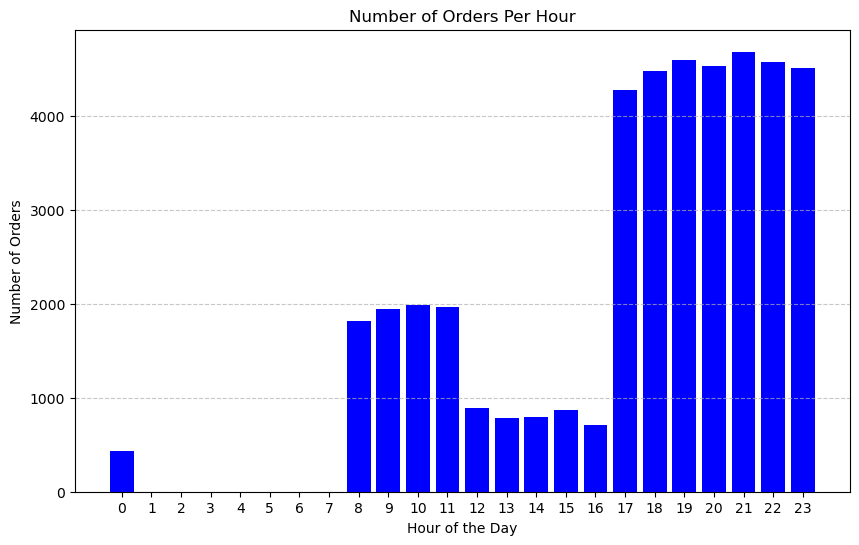

In [51]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, FloatType, IntegerType
from pyspark.sql.functions import col

# Calculate the amount of orders for each hour
def calculate_orders_per_hour(df):
    # Convert order_ts to hour
    df = df.withColumn("order_hour", (col("order_ts") / 3600).cast("int") % 24)
    # Remove rows with NULL values in order_hour
    df = df.filter(df["order_hour"].isNotNull())
    # Group by hour and count orders
    orders_per_hour = df.groupBy("order_hour").count().orderBy("order_hour")
    return orders_per_hour

orders_per_hour_df = calculate_orders_per_hour(delivery_order_df)

# Show the result in a table
orders_per_hour_df.show()

# Convert to Pandas for plotting
orders_per_hour_pd = orders_per_hour_df.toPandas()

# Plot a bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(orders_per_hour_pd["order_hour"], orders_per_hour_pd["count"], color="blue")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.title("Number of Orders Per Hour")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Assuming here the business hours are 8:00am to 12:00pm.

2.2.3 Join the delivery_order with geolocation data frame, calculate the distance between a restaurant and the delivery location, and store the distance in a new column named delivery_distance. (hint: You may need to install an additional library like GeoPandas to calculate the distance between two points).

In [13]:
!pip install geopandas[all]

In [14]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, FloatType

def calculate_delivery_distance(delivery_order_df, geolocation_df):
    # Convert Spark DataFrames to Pandas DataFrames
    delivery_order_pd = delivery_order_df.toPandas()
    geolocation_pd = geolocation_df.toPandas()
    
    # Merge geolocation data for restaurant and delivery points
    merged_df = delivery_order_pd \
        .merge(geolocation_pd.rename(columns={"geoid": "restaurant_geoid", 
                                               "latitude": "restaurant_lat", 
                                               "longitude": "restaurant_lon"}), 
               on="restaurant_geoid", how="inner") \
        .merge(geolocation_pd.rename(columns={"geoid": "delivery_geoid", 
                                               "latitude": "delivery_lat", 
                                               "longitude": "delivery_lon"}), 
               on="delivery_geoid", how="inner")
    
    # Create GeoPandas GeoDataFrames for restaurants and delivery locations
    merged_df["restaurant_geometry"] = merged_df.apply(
        lambda row: Point(row["restaurant_lon"], row["restaurant_lat"]), axis=1
    )
    merged_df["delivery_geometry"] = merged_df.apply(
        lambda row: Point(row["delivery_lon"], row["delivery_lat"]), axis=1
    )
    
    # Calculate distances (Euclidean in degree units, not CRS-transformed)
    merged_df["delivery_distance"] = merged_df.apply(
        lambda row: row["restaurant_geometry"].distance(row["delivery_geometry"]), axis=1
    )
    
    # Drop geometry columns to avoid Spark compatibility issues
    merged_df = merged_df.drop(columns=["restaurant_geometry", "delivery_geometry"])
    
    # Return the updated DataFrame
    return merged_df

# Apply the function
delivery_order_with_distance = calculate_delivery_distance(delivery_order_df, geolocation_df)

# Convert the result back to Spark DataFrame
delivery_order_with_distance_spark = spark.createDataFrame(delivery_order_with_distance)

# Show the result
delivery_order_with_distance_spark.select("order_id", "restaurant_geoid", "delivery_geoid", "delivery_distance").show(truncate=False)


/opt/conda/lib/python3.10/site-packages/pyspark/sql/pandas/conversion.py:485: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if should_localize and is_datetime64tz_dtype(s.dtype) and s.dt.tz is not None:


+--------+------------------------------------+------------------------------------+-------------------+
|order_id|restaurant_geoid                    |delivery_geoid                      |delivery_distance  |
+--------+------------------------------------+------------------------------------+-------------------+
|0x1ec7  |13ecba7d-6322-4875-a125-2b6f2460a8ce|744b5795-a105-41e3-9745-695aca9d7d61|0.04243007567584951|
|0x5c6   |13ecba7d-6322-4875-a125-2b6f2460a8ce|744b5795-a105-41e3-9745-695aca9d7d61|0.04243007567584951|
|0x8183  |13ecba7d-6322-4875-a125-2b6f2460a8ce|744b5795-a105-41e3-9745-695aca9d7d61|0.04243007567584951|
|0x1232  |13ecba7d-6322-4875-a125-2b6f2460a8ce|744b5795-a105-41e3-9745-695aca9d7d61|0.04243007567584951|
|0x4f42  |13ecba7d-6322-4875-a125-2b6f2460a8ce|744b5795-a105-41e3-9745-695aca9d7d61|0.04243007567584951|
|0x7861  |13ecba7d-6322-4875-a125-2b6f2460a8ce|744b5795-a105-41e3-9745-695aca9d7d61|0.04243007567584951|
|0xb069  |13ecba7d-6322-4875-a125-2b6f2460a8ce|744b5795

2.2.4 Using the data from 3, find the top 10 drivers travelling the longest distance.

In [15]:
from pyspark.sql.functions import col, sum

# Find the top 10 drivers traveling the longest distance
top_10_drivers = delivery_order_with_distance_spark.groupBy("delivery_person_id") \
    .agg(sum("delivery_distance").alias("total_distance")) \
    .orderBy(col("total_distance").desc()) \
    .limit(10)

# Show the result
top_10_drivers.show(truncate=False)


+------------------+------------------+
|delivery_person_id|total_distance    |
+------------------+------------------+
|COIMBRES08DEL03   |469.5380801415355 |
|BHPRES15DEL02     |371.27854573899936|
|RANCHIRES09DEL01  |357.87741528642783|
|MUMRES08DEL02     |344.9692984538354 |
|MUMRES20DEL01     |343.5584753291104 |
|COIMBRES14DEL03   |336.9943013238874 |
|DEHRES19DEL01     |336.12426882310075|
|DEHRES13DEL02     |335.90335284027316|
|CHENRES16DEL02    |331.5502335217211 |
|CHENRES04DEL01    |329.6882177879918 |
+------------------+------------------+



2.2.5 For each type of order, plot a histogram of meal preparation time. The plot can be done with multiple legends or sub-plots. (note: you can decide your bin size).

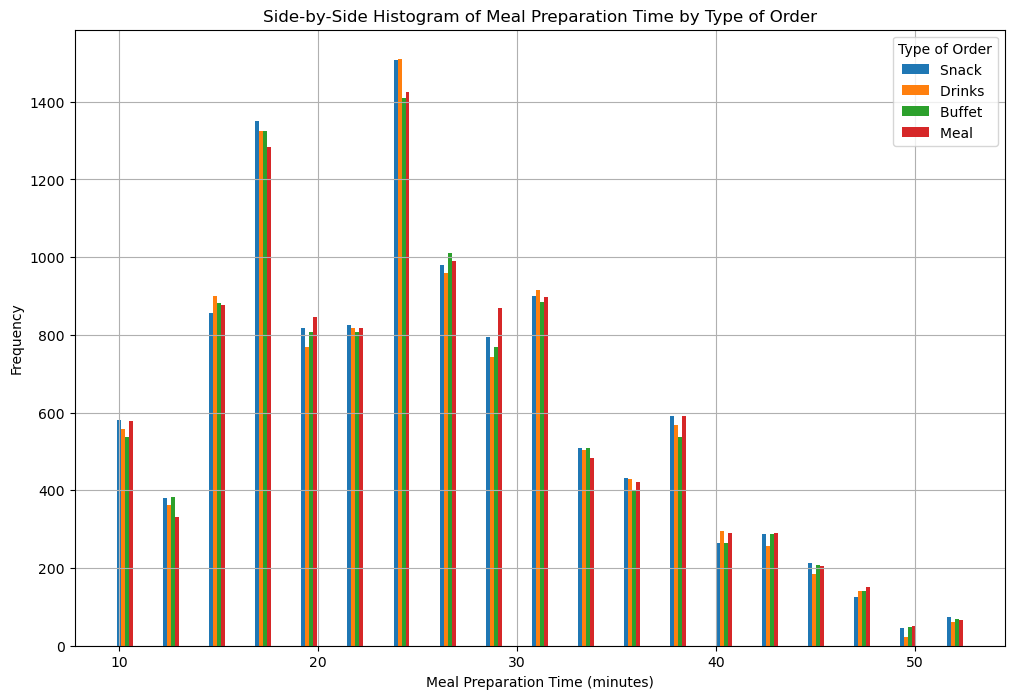

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert the Spark DataFrame to Pandas DataFrame
data_pd = delivery_order_with_distance_spark.select("type_of_order", "time_taken").toPandas()

# Convert `time_taken` from string format (e.g., "(min) 15") to numeric values
data_pd["time_taken"] = data_pd["time_taken"].str.replace("(min)", "", regex=False).str.strip().astype(float)

# Group the data by `type_of_order`
unique_order_types = data_pd["type_of_order"].unique()

# Create bins for the histogram
bins = np.linspace(data_pd["time_taken"].min(), data_pd["time_taken"].max(), 20)

# Plot histograms side-by-side
plt.figure(figsize=(12, 8))
width = 0.2  # Width of each bar in the histogram

for i, order_type in enumerate(unique_order_types):
    subset = data_pd[data_pd["type_of_order"] == order_type]
    # Calculate histogram values
    hist, edges = np.histogram(subset["time_taken"], bins=bins)
    # Shift the bins for side-by-side display
    plt.bar(edges[:-1] + i * width, hist, width=width, label=order_type, align='center')

# Add plot details
plt.title("Side-by-Side Histogram of Meal Preparation Time by Type of Order")
plt.xlabel("Meal Preparation Time (minutes)")
plt.ylabel("Frequency")
plt.legend(title="Type of Order")
plt.grid()
plt.show()


2.2.6 (Open Question) Explore the dataset and use a delivery person’s rating as a performance indicator. Is a lower rating usually correlated to a longer delivery time? What might be the contributing factors to the low rate of drivers? Please include one plot and discussion based on your observation.

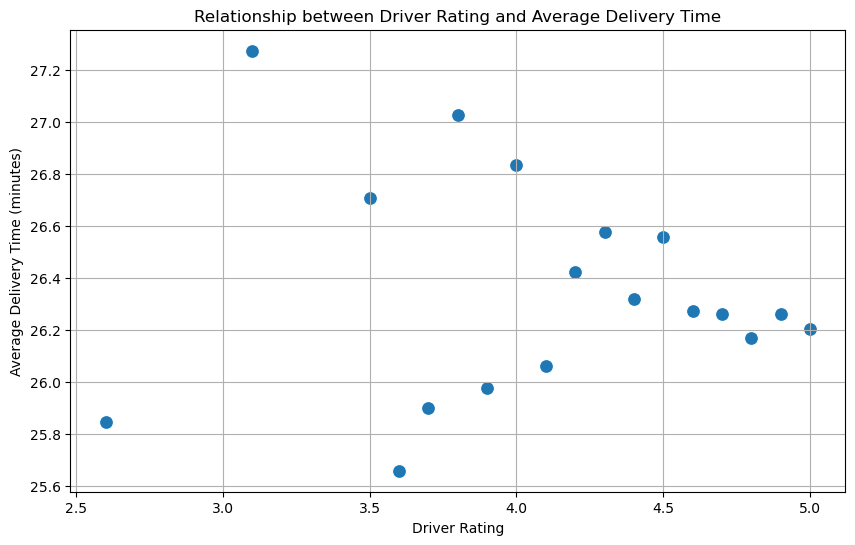

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Merge the delivery person ratings with the delivery order data
merged_data = delivery_order_with_distance_spark.join(
    delivery_person_df,
    delivery_order_with_distance_spark.delivery_person_id == delivery_person_df.person_id,
    how="inner"
).select(
    "delivery_person_id", "rating", "time_taken"
)

# Convert to Pandas DataFrame for analysis
merged_data_pd = merged_data.toPandas()

# Clean and preprocess data
merged_data_pd["time_taken"] = (
    merged_data_pd["time_taken"]
    .str.replace("(min)", "")
    .str.strip()
    .astype(float)
)

# Group by ratings and calculate average delivery times
rating_delivery_time = merged_data_pd.groupby("rating")["time_taken"].mean().reset_index()

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rating_delivery_time, x="rating", y="time_taken", s=100)
plt.title("Relationship between Driver Rating and Average Delivery Time")
plt.xlabel("Driver Rating")
plt.ylabel("Average Delivery Time (minutes)")
plt.grid()
plt.show()


Discussion: 
The scatter plot reveals a negative correlation between driver ratings and average delivery times. Lower ratings are associated with longer delivery times, while higher ratings are linked to shorter delivery times.
Drivers with ratings close to 2.5 or 3.0 tend to have the longest delivery times, indicating potential issues with their performance, such as delays or inefficiency.
Ratings above 4.5 show a consistent trend of shorter delivery times, suggesting that higher-rated drivers perform deliveries more efficiently.
Factors contributing to lower ratings might include poor route management, lack of punctuality, or inadequate customer communication.
External factors like traffic congestion, weather conditions, or vehicle maintenance could also impact delivery times and, subsequently, ratings.
Further analysis could explore correlations with other variables, such as traffic data or time of day, to gain deeper insights into the contributing factors.

### Part 3 RDDs vs DataFrame vs Spark SQL (25%) <a class="anchor" name="part-3"></a>
Implement the following queries using RDDs, DataFrame in SparkSQL separately. Log the  time taken for each query in each approach using the “%%time” built-in magic command in Jupyter Notebook and discuss the performance difference between these 3 approaches.

#### Complex Query: <strong>Calculate the time taken on the road (defined as the total time taken minus restaurants’ order preparation time, i.e., total time - (ready_ts - order_ts)).    
For each road_traffic_condition, using a 10-minute bucket size of time on the road(e.g. 0-10, 10-20, 20-30, etc.), show the percentage of each bucket.  
(note: You can reuse the loaded data/variables from part 1&2.)  
(hint: You may create intermediate RDD/dataframes for this query.)  
</strong>

#### 3.1. RDD Implementation

In [18]:
pip install ipython


Note: you may need to restart the kernel to use updated packages.


In [23]:
%%time
from pyspark import SparkContext, SparkConf
from collections import Counter
import re

# Helper function to check if a string is numeric
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Helper function to clean and parse a row
def parse_row(row):
    # Split the row by commas and strip quotes/whitespace
    cols = [col.strip().strip('"') for col in row.split(",")]
    # Extract numeric value from `time_taken` if present
    time_taken_match = re.search(r"\d+", cols[8]) if len(cols) > 8 else None
    time_taken = float(time_taken_match.group()) if time_taken_match else None
    return cols, time_taken

# Retrieve the existing SparkContext or create one if it doesn't exist
conf = SparkConf().setAppName("TimeOnRoadAnalysis").setMaster("local")
sc = SparkContext.getOrCreate(conf=conf)

# Path to your CSV file
file_path = "delivery_order.csv"

# Load the CSV file into an RDD
delivery_order_rdd = sc.textFile(file_path)

# Skip the header row
header = delivery_order_rdd.first()
delivery_order_rdd = delivery_order_rdd.filter(lambda row: row != header)

# Parse rows and filter valid records
valid_rows_rdd = delivery_order_rdd.map(parse_row).filter(
    lambda row: (
        len(row[0]) > 8  # Ensure enough columns
        and is_numeric(row[0][2])  # Check order_ts
        and is_numeric(row[0][3])  # Check ready_ts
        and row[1] is not None  # Check extracted time_taken
        and 0 <= row[1] <= 180  # Validate time_taken (0-180 minutes)
        and float(row[0][3]) > float(row[0][2])  # Validate timestamps
    )
)

print("Total valid records after filtering:", valid_rows_rdd.count())

# Function to calculate time on road and bucketize
def calculate_time_on_road_rdd(rdd):
    # Calculate time on the road
    time_on_road_rdd = rdd.map(
        lambda row: (
            row[0][5],  # road_traffic_condition
            row[1] - (float(row[0][3]) - float(row[0][2])) / 60  # Convert seconds to minutes
        )
    )
    
    # Filter out invalid rows (e.g., where time_on_road is negative or too large)
    time_on_road_rdd = time_on_road_rdd.filter(lambda x: 0 <= x[1] <= 180)
    
    # Bucketize time on the road into 10-minute intervals
    bucketized_rdd = time_on_road_rdd.map(
        lambda x: (
            x[0],  # road_traffic_condition
            f"{int(x[1] // 10) * 10}-{int(x[1] // 10) * 10 + 10}"  # Bucket
        )
    )
    
    # Count occurrences of each bucket for each road_traffic_condition
    bucket_counts = bucketized_rdd.countByValue()
    
    # Aggregate and calculate percentages
    total_counts_per_condition = Counter({k[0]: 0 for k in bucket_counts.keys()})
    for key, count in bucket_counts.items():
        total_counts_per_condition[key[0]] += count
    percentages = {
        (condition, bucket): (count / total_counts_per_condition[condition]) * 100
        for (condition, bucket), count in bucket_counts.items()
    }
    return percentages

# Calculate the time on the road and bucket percentages using RDD
percentages_rdd = calculate_time_on_road_rdd(valid_rows_rdd)

# Display the results
for (condition, bucket), percentage in sorted(percentages_rdd.items()):
    print(f"Traffic Condition: {condition}, Time Bucket: {bucket}, Percentage: {percentage:.2f}%")


Total valid records after filtering: 43031
Traffic Condition: High, Time Bucket: 0-10, Percentage: 17.37%
Traffic Condition: High, Time Bucket: 10-20, Percentage: 42.52%
Traffic Condition: High, Time Bucket: 20-30, Percentage: 31.68%
Traffic Condition: High, Time Bucket: 30-40, Percentage: 6.79%
Traffic Condition: High, Time Bucket: 40-50, Percentage: 1.63%
Traffic Condition: Jam, Time Bucket: 0-10, Percentage: 13.41%
Traffic Condition: Jam, Time Bucket: 10-20, Percentage: 30.50%
Traffic Condition: Jam, Time Bucket: 20-30, Percentage: 32.61%
Traffic Condition: Jam, Time Bucket: 30-40, Percentage: 19.19%
Traffic Condition: Jam, Time Bucket: 40-50, Percentage: 4.29%
Traffic Condition: Low, Time Bucket: 0-10, Percentage: 40.17%
Traffic Condition: Low, Time Bucket: 10-20, Percentage: 44.40%
Traffic Condition: Low, Time Bucket: 20-30, Percentage: 13.21%
Traffic Condition: Low, Time Bucket: 30-40, Percentage: 2.22%
Traffic Condition: Medium, Time Bucket: 0-10, Percentage: 21.74%
Traffic Cond

#### 3.2. DataFrame Implementation

In [28]:
%%time

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, expr, regexp_extract, sum as spark_sum, count, floor
from pyspark.sql.types import FloatType

# Initialize SparkSession
spark = SparkSession.builder.appName("TimeOnRoadAnalysis").master("local").getOrCreate()

# Path to your CSV file
file_path = "delivery_order.csv"

# Load the CSV file into a DataFrame
delivery_order_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Extract numeric value from `time_taken` and convert to minutes
delivery_order_df = delivery_order_df.withColumn(
    "time_taken_minutes",
    regexp_extract(col("time_taken"), r"(\d+)", 1).cast(FloatType())
)

# Calculate the time on the road
delivery_order_df = delivery_order_df.withColumn(
    "time_on_road",
    col("time_taken_minutes") - (col("ready_ts") - col("order_ts")) / 60
)

# Filter out invalid rows where `time_on_road` is null, negative, or unrealistic (e.g., > 300 minutes)
valid_delivery_df = delivery_order_df.filter(
    col("time_on_road").isNotNull() & 
    (col("time_on_road") >= 0) & 
    (col("time_on_road") <= 300)  # Assuming a reasonable upper limit for time_on_road
)

# Bucketize time on the road into 10-minute intervals
valid_delivery_df = valid_delivery_df.withColumn(
    "time_bucket",
    expr("concat(floor(time_on_road / 10) * 10, '-', (floor(time_on_road / 10) * 10) + 10)")
)

# Calculate the total count per `road_condition`
total_counts_df = valid_delivery_df.groupBy("road_condition").agg(count("*").alias("total_count"))

# Count occurrences of each bucket for each `road_condition`
bucket_counts_df = valid_delivery_df.groupBy("road_condition", "time_bucket").agg(count("*").alias("bucket_count"))

# Join with the total counts to calculate percentages
result_df = bucket_counts_df.join(total_counts_df, "road_condition").withColumn(
    "percentage",
    (col("bucket_count") / col("total_count")) * 100
).select("road_condition", "time_bucket", "percentage")

# Show the results
result_df.orderBy("road_condition", "time_bucket").show(truncate=False)


+--------------+-----------+------------------+
|road_condition|time_bucket|percentage        |
+--------------+-----------+------------------+
|High          |0-10       |17.368670137245623|
|High          |10-20      |42.522479886417415|
|High          |20-30      |31.68480832938949 |
|High          |30-40      |6.7912920018930425|
|High          |40-50      |1.6327496450544252|
|Jam           |0-10       |13.411592076302275|
|Jam           |10-20      |30.498899486427   |
|Jam           |20-30      |32.61188554658841 |
|Jam           |30-40      |19.18561995597946 |
|Jam           |40-50      |4.292002934702861 |
|Low           |0-10       |40.17144546260715 |
|Low           |10-20      |44.39846290274904 |
|Low           |20-30      |13.205734555128585|
|Low           |30-40      |2.224357079515223 |
|Medium        |0-10       |21.742453190676347|
|Medium        |10-20      |39.27206725257929 |
|Medium        |20-30      |29.35613297669087 |
|Medium        |30-40      |8.9224302636

#### 3.3. Spark SQL Implementation

In [29]:
%%time
from pyspark.sql import SparkSession
from pyspark.sql.functions import expr, col, regexp_extract, count, floor, concat, round
from pyspark.sql.types import FloatType

# Initialize SparkSession
spark = SparkSession.builder.appName("TimeOnRoadAnalysis").master("local").getOrCreate()

# Path to your CSV file
file_path = "delivery_order.csv"

# Load the CSV file into a DataFrame
delivery_order_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Extract numeric value from `time_taken` and convert to minutes
delivery_order_df = delivery_order_df.withColumn(
    "time_taken_minutes",
    regexp_extract(col("time_taken"), r"(\d+)", 1).cast(FloatType())
)

# Calculate the time on the road
delivery_order_df = delivery_order_df.withColumn(
    "time_on_road",
    col("time_taken_minutes") - (col("ready_ts") - col("order_ts")) / 60
)

# Filter out invalid rows where `time_on_road` is null, negative, or unrealistic (e.g., > 300 minutes)
valid_delivery_df = delivery_order_df.filter(
    col("time_on_road").isNotNull() & 
    (col("time_on_road") >= 0) & 
    (col("time_on_road") <= 300)  # Assuming a reasonable upper limit for time_on_road
)

# Register the DataFrame as a temporary SQL table
valid_delivery_df.createOrReplaceTempView("delivery_data")

# Write and execute the SQL query
query = """
SELECT
    road_condition,
    CONCAT(FLOOR(time_on_road / 10) * 10, '-', FLOOR(time_on_road / 10) * 10 + 10) AS time_bucket,
    COUNT(*) AS bucket_count,
    ROUND((COUNT(*) * 100.0) / SUM(COUNT(*)) OVER (PARTITION BY road_condition), 2) AS percentage
FROM delivery_data
GROUP BY road_condition, FLOOR(time_on_road / 10)
ORDER BY road_condition, time_bucket
"""

result_df = spark.sql(query)

# Show the results
result_df.show(truncate=False)


+--------------+-----------+------------+----------+
|road_condition|time_bucket|bucket_count|percentage|
+--------------+-----------+------------+----------+
|High          |0-10       |734         |17.37     |
|High          |10-20      |1797        |42.52     |
|High          |20-30      |1339        |31.68     |
|High          |30-40      |287         |6.79      |
|High          |40-50      |69          |1.63      |
|Jam           |0-10       |1828        |13.41     |
|Jam           |10-20      |4157        |30.50     |
|Jam           |20-30      |4445        |32.61     |
|Jam           |30-40      |2615        |19.19     |
|Jam           |40-50      |585         |4.29      |
|Low           |0-10       |5436        |40.17     |
|Low           |10-20      |6008        |44.40     |
|Low           |20-30      |1787        |13.21     |
|Low           |30-40      |301         |2.22      |
|Medium        |0-10       |2276        |21.74     |
|Medium        |10-20      |4111        |39.27

### 3.4 Which one is the easiest to implement in your opinion? Log the time taken for each query, and observe the query execution time, among RDD, DataFrame, SparkSQL, which is the fastest and why? Please include proper reference. (Maximum 500 words.)

Fastest: Spark SQL is the fastest because it leverages Catalyst optimization to produce highly efficient query execution plans.
Slowest: DataFrame operations are slower in this case due to metadata handling and optimization overhead, which scales poorly for iterative or complex transformations.
RDD: Although RDDs are lightweight, they lack optimization, resulting in slower performance for large-scale data processing.


RDDs:

RDDs provide a low-level API and allow detailed control over transformations and actions. However, implementing the query using RDDs requires several custom map and filter operations, manual bucketization, and explicit calculations for percentages.
Writing this logic is verbose and prone to errors, especially when handling complex datasets or multiple transformations.
Debugging RDD operations can also be challenging as the API lacks rich introspection capabilities.
Ease of Implementation: Low


DataFrames:

DataFrames provide a higher-level abstraction and are easier to use than RDDs. Using DataFrame APIs, we can perform filtering, aggregations, and calculations with expressive and concise syntax.
The inclusion of built-in functions like groupBy, agg, and withColumn reduces boilerplate code and makes the implementation cleaner and less error-prone.
While more user-friendly than RDDs, handling intermediate transformations and managing large DataFrame chains can still add complexity.
Ease of Implementation: Moderate


Spark SQL:

Spark SQL offers the most intuitive and user-friendly approach for implementing the query. Using SQL-like syntax, we can directly express the query logic, including filtering, grouping, and percentage calculations, without needing to chain multiple transformations.
The SQL approach is ideal for users familiar with database systems, as it abstracts away the complexity of the underlying operations.
Ease of Implementation: High

WHY?

Spark SQL emerges as the fastest approach because:
It leverages the Catalyst optimizer for efficient query planning and execution.
The SQL syntax simplifies operations, avoiding excessive transformations, and allows Spark to optimize the query holistically.
The declarative nature of SQL allows Spark to focus on execution efficiency rather than user-defined transformations.

Reference:
Zaharia, M., Chowdhury, M., Das, T., et al. (2012). Resilient Distributed Datasets: A Fault-Tolerant Abstraction for In-Memory Cluster Computing. USENIX.
https://www.usenix.org/system/files/conference/nsdi12/nsdi12-final138.pdf

### Some ideas on the comparison

Armbrust, M., Huai, Y., Liang, C., Xin, R., & Zaharia, M. (2015). Deep Dive into Spark SQL’s Catalyst Optimizer. Retrieved September 30, 2017, from https://databricks.com/blog/2015/04/13/deep-dive-into-spark-sqls-catalyst-optimizer.html

Damji, J. (2016). A Tale of Three Apache Spark APIs: RDDs, DataFrames, and Datasets. Retrieved September 28, 2017, from https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html

Data Flair (2017a). Apache Spark RDD vs DataFrame vs DataSet. Retrieved September 28, 2017, from http://data-flair.training/blogs/apache-spark-rdd-vs-dataframe-vs-dataset

Prakash, C. (2016). Apache Spark: RDD vs Dataframe vs Dataset. Retrieved September 28, 2017, from http://why-not-learn-something.blogspot.com.au/2016/07/apache-spark-rdd-vs-dataframe-vs-dataset.html

Xin, R., & Rosen, J. (2015). Project Tungsten: Bringing Apache Spark Closer to Bare Metal. Retrieved September 30, 2017, from https://databricks.com/blog/2015/04/28/project-tungsten-bringing-spark-closer-to-bare-metal.html